In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision.io import read_image # for image reading

In [2]:
# Getting image with PyTorch
# If you run it with Google Colab, you need to add image to the files

path = 'cat.jpg'
image = read_image(path)

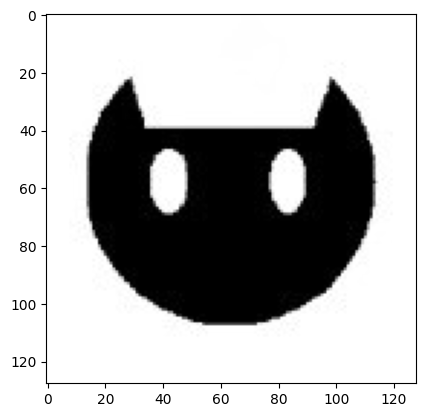

In [3]:
# Dealing with tensor representation of image

indices = torch.tensor([0])
image = torch.index_select(image, 0, indices) # part of image
img = image.squeeze() # decrease the dimension
plt.imshow(img, cmap="gray")
plt.show()

In [4]:
height = img.size()[0]
width = img.size()[1]

# X Y arrays

X = np.full((height, 1), 0)
for i in range(width - 1):
    for_X = np.full((height, 1), i + 1) # x-column
    X = np.concatenate((X, for_X), 1)

Y = np.full((1, width), height - 1)
for i in range(height - 1):
    for_Y = np.full((1, width), height - (i + 2)) # x-column
    Y = np.concatenate((Y, for_Y), 0)

In [5]:
# Cat class

class cat:
    brightness = 0
    x = 0
    y = 0

    def __init__(self, brightness, x, y):
        self.brightness = brightness
        self.x = x
        self.y = y

In [6]:
# Transformation
X_ = X + Y
Y_ = X + 2 * Y

# X-Shift
for i in range(height):
    for j in range(width):
        if X_[i, j] > width - 1:
            X_[i, j] = X_[i, j] - width # - (width - 1)

# Y-Shift
for i in range(height):
    for j in range(width):
        if Y_[i, j] > height - 1 and Y_[i, j] <= (height - 1) * 2 :
            Y_[i, j] = Y_[i, j] - height # - (height - 1)
        if Y_[i, j] > (height - 1) * 2 :
            Y_[i, j] = Y_[i, j] - height * 2 # - (height - 1) * 2

In [7]:
array_with_cats = np.full((height, width), cat(0, 0, 0))

for i in range(height):
    for j in range(width):
        array_with_cats[i, j] = cat(img[i, j].item(), X_[i, j], Y_[i, j])

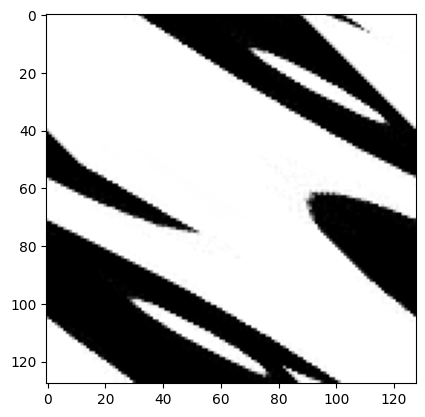

In [8]:
poor_kitty = np.full((height, width), 255)

for i in range(height):
    for j in range(width):
        poor_kitty[X_[i, j], Y_[i, j]] = array_with_cats[i, j].brightness

plt.imshow(poor_kitty, cmap="gray")
plt.show()